In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
points = np.array([[1,1.4],[2.1,2],[2.7,3],[4.5,4.1]])
points.shape

(4, 2)

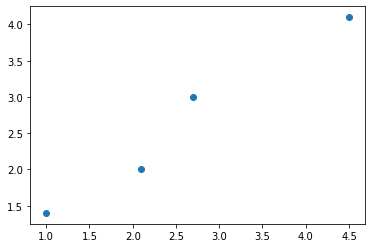

In [3]:
plt.scatter(points[:,0], points[:,1])
plt.show()

In [4]:
def computDeltas ( model, point ):
    (m,b) = model; (x,y) = point
    error = x*m + b - y
    norm = np.linalg.norm([x * error, error])
    return ( error, x * error / norm, error/ norm)

In [5]:
def doStep ( model, points, stepSize = 0.05 ):
    (m,b) = model
    e = 0
    for (x,y) in points:
        (_e,dm,db) = computDeltas((m,b), (x,y))
        m -= dm * stepSize * abs(_e); b -= db * stepSize * abs(_e)
        e += _e
    return (e/len(points),m,b)

In [6]:
def render (errors,model) :
    (m,b) = model
    plt.scatter(points[:,0], points[:,1])
    plt.plot([0,5], [b,5*m+b], color='red')
    plt.show()
    if len(errors) is not 0:
        plt.plot(range(len(errors)), errors, color='red')
        plt.show()

In [7]:
def runRandomModel ():
    model = (np.random.rand(2) - 0.5) * 3
    (m,b) = (model[0], model[1])
    errors = []
    render([], (m,b) )
    for i in range(200):
        (e,m,b) = doStep((m,b),points)
        errors.append(e**2)
    render(errors, (m,b) )

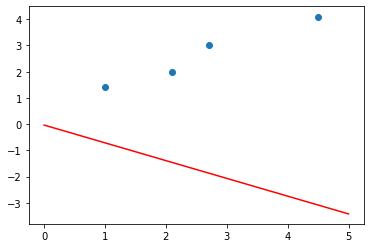

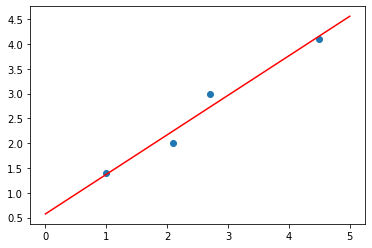

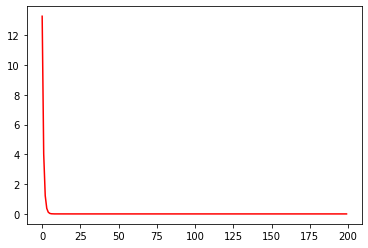

In [8]:
runRandomModel()